# Introduction

The Predictive Insights competition focuses on addressing youth unemployment in developing countries, with a particular emphasis on South Africa. The challenge is to create a machine learning model to predict which young individuals will gain employment, utilizing data from periodic labour market surveys. By achieving accurate predictions, stakeholders can craft evidence-based interventions to facilitate young people's transition into the workforce or enhance their income. 

# The Data

The dataset comprises four survey rounds from South African youth, taken at 6-month intervals, and includes a range of data types such as numerical, categorical, and textual inputs. Additional details like age, educational background, and prior results are also provided. The aim is to predict employment status one year after the initial survey using baseline data. The training dataset combines baseline information with the target outcome (employment status), while the test set only provides the baseline data. The overarching goal is to assist Predictive Insights in understanding youth employment patterns and designing effective strategies for integration into the labor market.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from joblib import dump


df = pd.read_csv(r"C:\Users\timothy.pesi\Downloads\Train.csv")

# Exploratory data analysis (EDA)

To  better exolore and understand the dataset the following is done Basic dataset info and statistics.
Visualization of distribution for numerical columns.
Visualization of counts for categorical columns.
Correlation heatmap for numerical columns.

In [9]:
# Basic info and statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        4020 non-null   object 
 1   Survey_date      4020 non-null   object 
 2   Round            4020 non-null   int64  
 3   Status           4020 non-null   object 
 4   Tenure           2626 non-null   float64
 5   Geography        4020 non-null   object 
 6   Province         4020 non-null   object 
 7   Matric           3012 non-null   float64
 8   Degree           2189 non-null   float64
 9   Diploma          2211 non-null   float64
 10  Schoolquintile   2359 non-null   float64
 11  Math             997 non-null    object 
 12  Mathlit          1353 non-null   object 
 13  Additional_lang  2018 non-null   object 
 14  Home_lang        381 non-null    object 
 15  Science          732 non-null    object 
 16  Female           4020 non-null   int64  
 17  Sa_citizen    

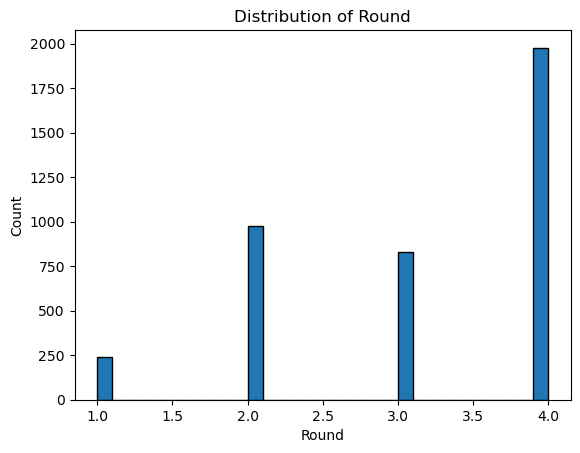

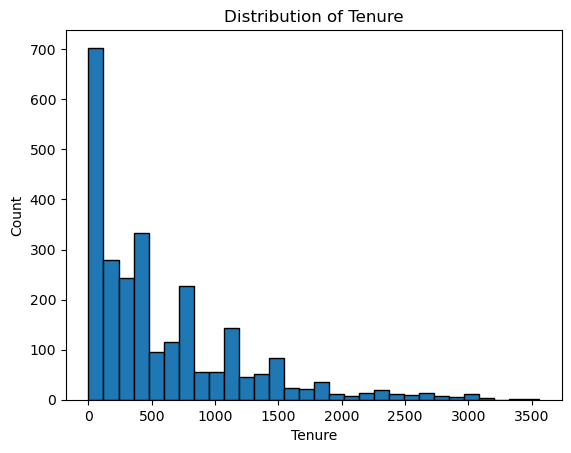

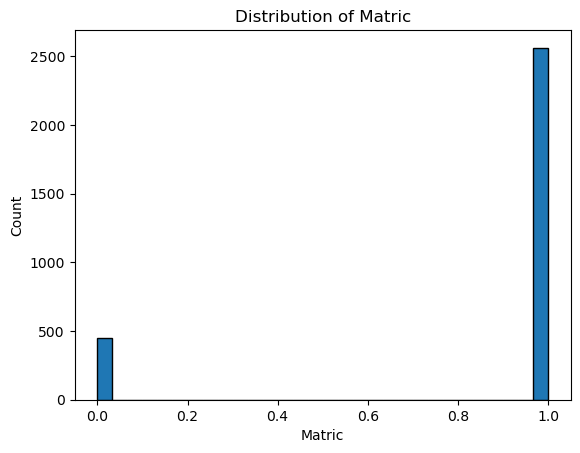

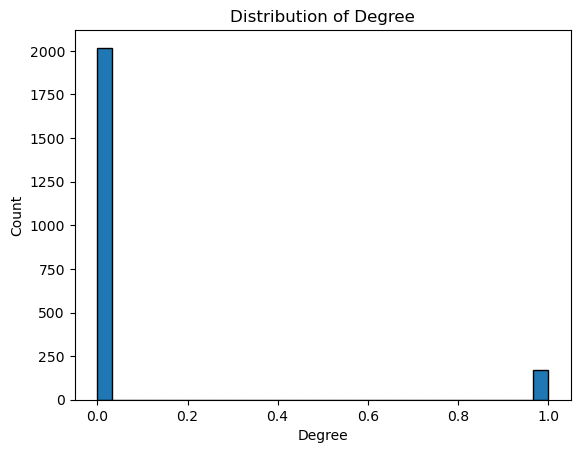

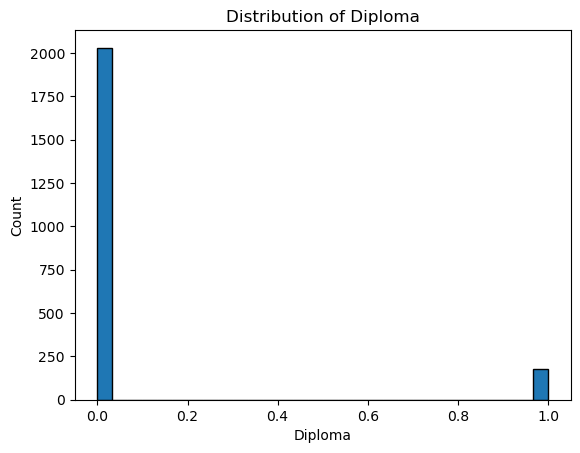

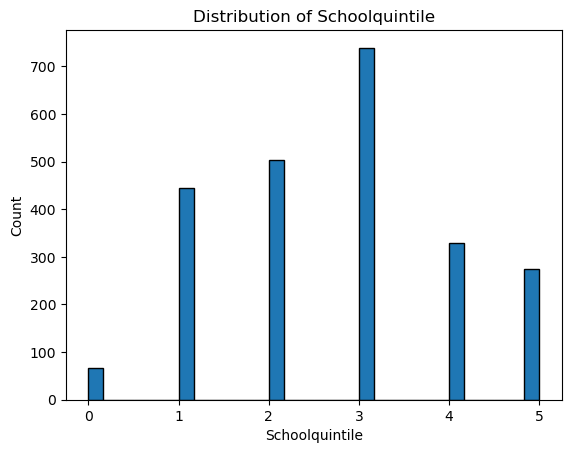

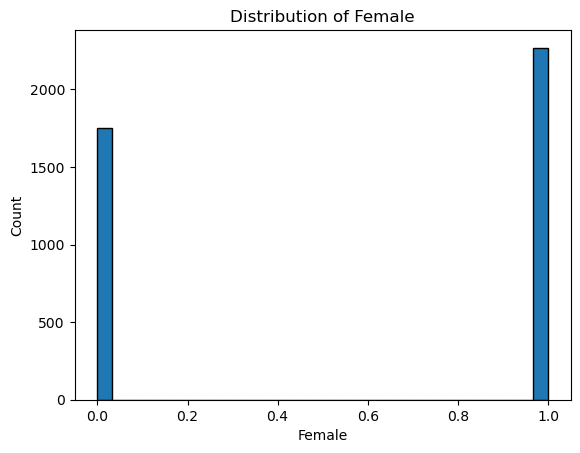

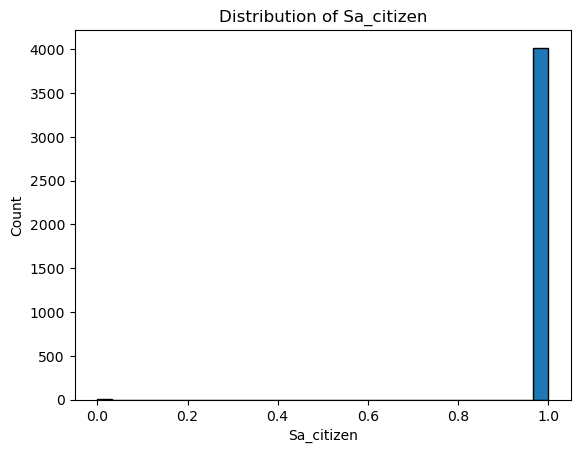

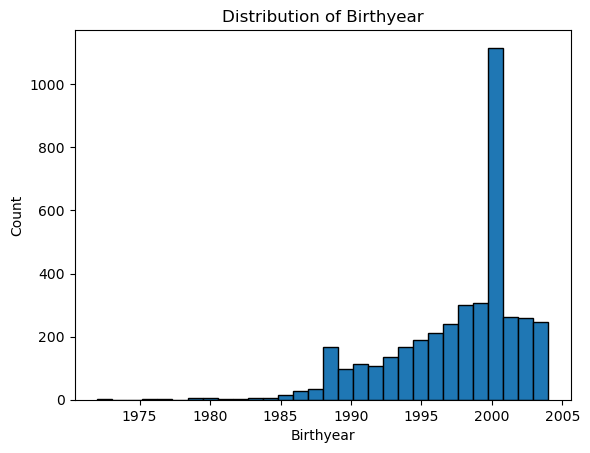

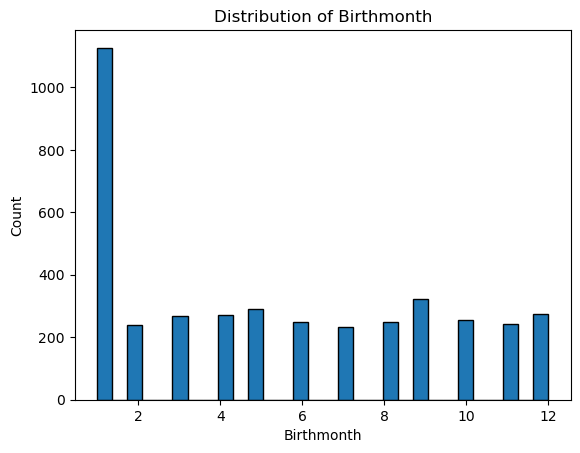

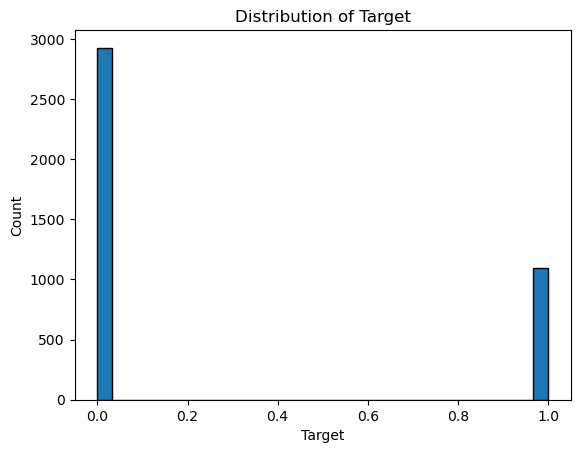

In [4]:
# 2. Visualization of distribution for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in numeric_cols:
    plt.hist(df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Visualization of counts for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    sns.countplot(df[col])
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

From this, we see that most candidates were born between 1995 and 2000.

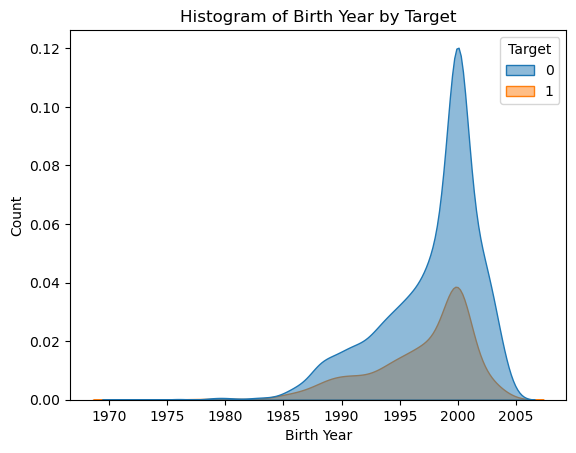

In [7]:

sns.kdeplot(data=df, x="Birthyear", hue="Target", fill=True, alpha=0.5)
plt.xlabel("Birth Year")
plt.ylabel("Count")
plt.title("Histogram of Birth Year by Target")
plt.show()

# Relationships between variables in the data frame

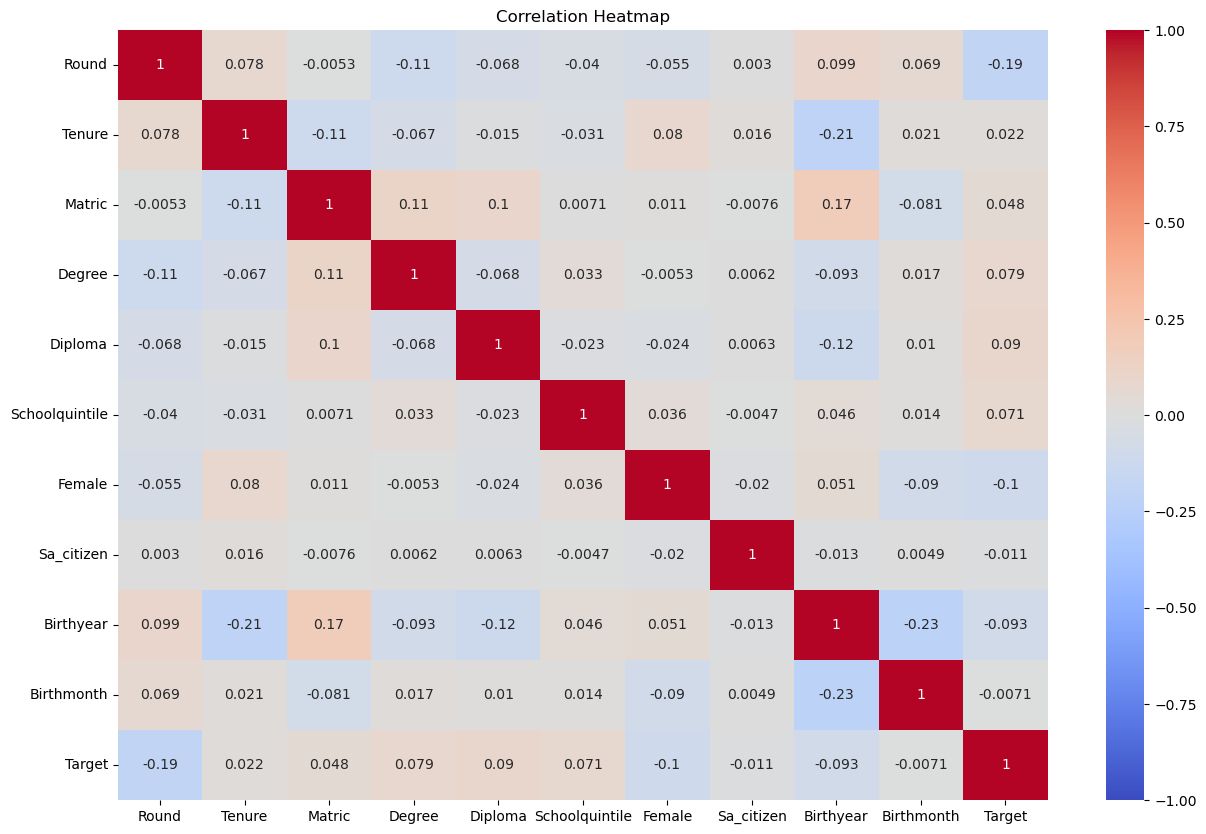

In [8]:
# 1. Correlation Matrix & Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering & Pre-processing

These steps prepare your data by addressing missing values, converting categorical variables into a machine-readable format, and then splitting the data into sets for training and testing machine learning models.

In [13]:
# Handling Missing Data:
df = df.fillna(df.median(numeric_only=True))

# One-Hot Encoding of Categorical Variables
df = pd.get_dummies(df, columns=['Status', 'Geography', 'Province', 'Math', 'Mathlit', 'Additional_lang','Home_lang','Science'])

# Feature Selection and Splitting Data
X = df.drop(columns=['Person_id', 'Survey_date', 'Target'])
y = df['Target']

# Train-Test Split into : 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building
The code below initializes and trains four different machine learning models: RandomForestClassifier, Logistic Regression, Support Vector Machine, and Gradient Boosting Classifier. It then evaluates each model's performance on both the training and test datasets and prints out their accuracy scores to allow for fine tuning of the model before deployement into production.

In [14]:
# Initializing and training a RandomForestClassifier
# n_estimators=100: Number of trees in the forest.
# min_samples_split=10: The minimum number of samples required to split an internal node.
# min_samples_leaf=5: The minimum number of samples required to be at a leaf node.
# random_state=42: Ensures consistent results across runs.
clf = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Training the RandomForestClassifier on the training data
clf.fit(X_train, y_train)

# Evaluating the RandomForestClassifier's performance on both training and test data
train_score = clf.score(X_train, y_train)  # Accuracy on training data
test_score = clf.score(X_test, y_test)     # Accuracy on test data

# Printing the accuracy scores
print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")

# Initializing and training a Logistic Regression model
# max_iter=1000: Maximum number of iterations for the solvers to converge.
# random_state=42: Ensures consistent results across runs.
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Printing the Logistic Regression model's accuracy on both training and test data
print(f"Logistic Regression Training Accuracy: {lr.score(X_train, y_train):.2f}")
print(f"Logistic Regression Testing Accuracy: {lr.score(X_test, y_test):.2f}\n")

# Initializing and training a Support Vector Machine (SVM) model
# random_state=42: Ensures consistent results across runs.
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Printing the SVM model's accuracy on both training and test data
print(f"SVM Training Accuracy: {svc.score(X_train, y_train):.2f}")
print(f"SVM Testing Accuracy: {svc.score(X_test, y_test):.2f}\n")

# Initializing and training a Gradient Boosting Classifier
# random_state=42: Ensures consistent results across runs.
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Printing the Gradient Boosting Classifier's accuracy on both training and test data
print(f"GBM Training Accuracy: {gbm.score(X_train, y_train):.2f}")
print(f"GBM Testing Accuracy: {gbm.score(X_test, y_test):.2f}\n")

Training Accuracy: 0.83
Testing Accuracy: 0.79
Logistic Regression Training Accuracy: 0.81
Logistic Regression Testing Accuracy: 0.80

SVM Training Accuracy: 0.73
SVM Testing Accuracy: 0.73

GBM Training Accuracy: 0.84
GBM Testing Accuracy: 0.82



In [ ]:
dump(gbm, 'model.pkl') # Saving the model as pickel file we'll use joblib to load the model.

# Model Deployment
From the code below we can setup to an API to serve the model to an application end-points. Depending on the  application's needs, one  can further expand and scale this to handle more complex requirements.

In [ ]:
from flask import Flask, request, jsonify
from joblib import load

app = Flask(__name__)

# Load the model
model = load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json(force=True)

    # Make a prediction
    prediction = model.predict([list(data.values())])

    # Return the prediction
    return jsonify(prediction[0])

if __name__ == '__main__':
    app.run(port=5000, debug=True)